# CHURN IN TELCO INDUSTRY

This project is made as a summary of the knowledge gained from the Data Science bootcamp organized by Sages

### Loyal vs Churn
The aim of this project is to predict whether a given customer of one of the telecommunications companies will leave or stay. To be able to recognize customers behavior it will be use machine learning based on classification models such as Random Forest, GradientBoosting or XGBoost.

Using differnt machine learning classifiers I will try to predict churn of customers. As such disproportions often appear in such data sets (customer churns), it is necessary to investigate whether this does not occur here and, if so, try to apply appropriate methods to solve this problem. In the dataset is 21 variable so maybe it will be usefull to drop some of them or try to change them somehow.

Dataset is from Kaggle: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset in csv format and each row contain information about one customer. The file with data has been added to repository.

### Steps to follow:  <a class="anchor" id="0-bullet"></a>
* [1. Importing needed libraries (including own fuctions), setting options](#1-bullet)
* [2. Importing data](#2-bullet)
* [3. Basic information and metrics about dataset](#3-bullet)
* [4. Visualization and correlation - first conclusions](#4-bullet)
* [5a. Feature selection and dimension reduction](#5-bullet)
* [5b. Choosing best dataset for model](#51-bullet)
* [6. Classification with different models](#6-bullet)
* [7. Crossvalidation to see if model is overfitting or not](#7-bullet)
* [8. Improving prediction with best model](#8-bullet)
* [9. Summary](#9-bullet)

## 1.Importing needed libraries (including own fuctions), setting options <a class="anchor" id="1-bullet"></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler  

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, cross_val_score

from sklearn.feature_selection import chi2, SelectKBest, RFE, SelectFromModel, SelectPercentile

from sklearn.utils import resample

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, \
                            recall_score, roc_auc_score, precision_score, recall_score, classification_report

from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline, Pipeline

import xgboost as xgb

In [9]:
from Functions_1 import unique_col, null_value, column_to_delete, return_categorical, \
                         return_numeric, print_basic_info, col_to_drop_after_high_corr, \
                         print_feature_summary, preprocessing, looking_for_parameters, plot_countplot, \
                         plot_hist_box, compare_with_target, corr_plot, target_in_outliers, \
                         print_report_for_classification, calculating_metrics, \
                         cvs_scores_to_df, create_measures, calculate_metrics, find_best_option

### Setting an options

In [10]:
sns.set_theme(style="whitegrid")
pd.set_option('display.max_rows', None)

In [11]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Hidden function'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

[Go back to the table of contents](#0-bullet)

## 2. Importing data <a class="anchor" id="2-bullet"></a>

In [12]:
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

In [13]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


[Go back to the table of contents](#0-bullet)

## 3. Basic information and metrics about dataset <a class="anchor" id="3-bullet"></a>

In [14]:
print(f"Dataset basic information: \n")
data.info()

Dataset basic information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night

In [15]:
print(f"Basic statistic for numerical variable:")
data.describe().T

Basic statistic for numerical variable:


,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [16]:
print_basic_info(data, 'churn', 35)

BASIC INFORMATION ABOUT THE DATASET 

--------------------------------------------------------------------------
Number of row: 3333, number of columns 21 

--------------------------------------------------------------------------
Is there null values: No 

Columns with null values: [] 

--------------------------------------------------------------------------
Categorical columns: ['state', 'phone number', 'international plan', 'voice mail plan'] 

Numeric columns: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn'] 

How many unique value have each columns:
- STATE:  51. This is 0.015% of data
- ACCOUNT LENGTH:  212. This is 0.064% of data
- AREA CODE:  3. This is 0.001% of data
- PHONE NUMBER:  333

### Conclusion about first check: 
1) There is no null value so we don't have to handle missing value

2) The dataset have 21 columns so we can try select best feature for models - feature selection

3) Data will have to be standardized

4) Variable: PHONE NUMBER have only unique values so we can remove it from dataset

5) Dataset is unbalanced, and members with churn is only 14,49% of all data so it will be usufull to try some resample data or use some methods for this problem like smote

### Next step:
* drop unnecesary columns
* divide data in X and y (optional at this stage)
* change prediction column in numeric type.
* divide columns in numeric and categorical -> categorical value invert into numeric by LabelEncoder or OneHotEncoder
* check corellation in the dataset



[Go back to the table of contents](#0-bullet)

## 4. Visualization and correlation <a class="anchor" id="4-bullet"></a>

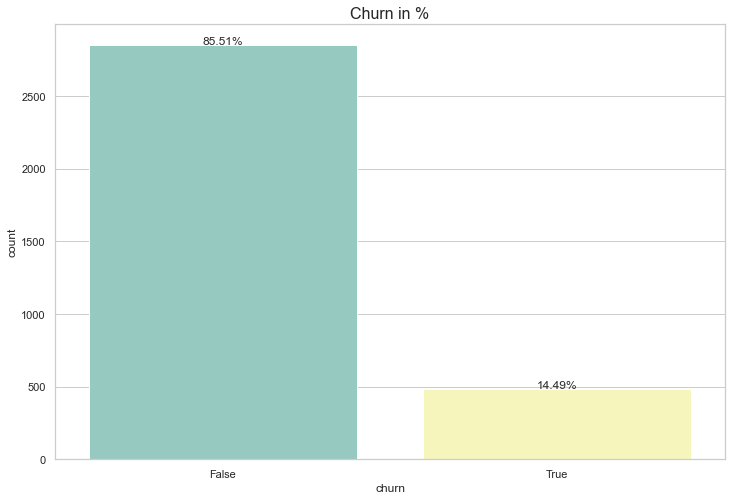

In [17]:
plot_countplot(data, 'churn', 'Churn in %', size=4)

As we see above the data is very unbalanced.

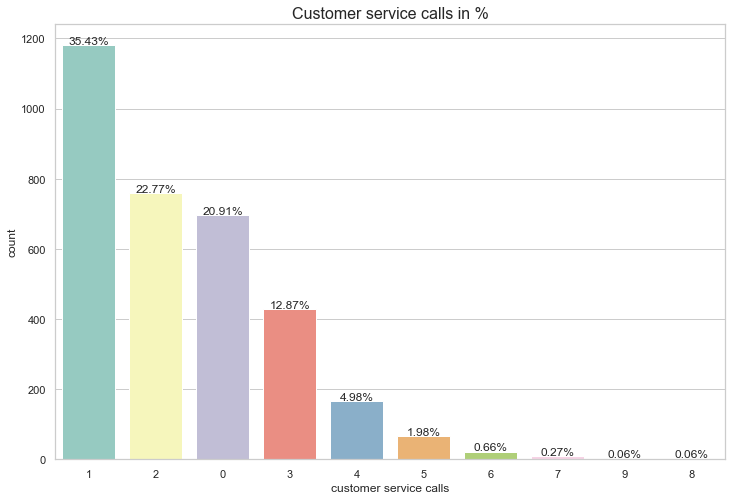

In [18]:
plot_countplot(data, 'customer service calls', 'Customer service calls in %', size=4)

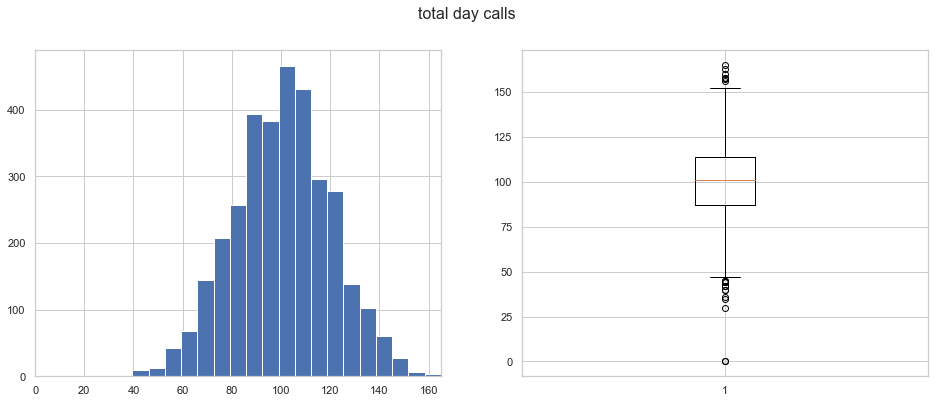

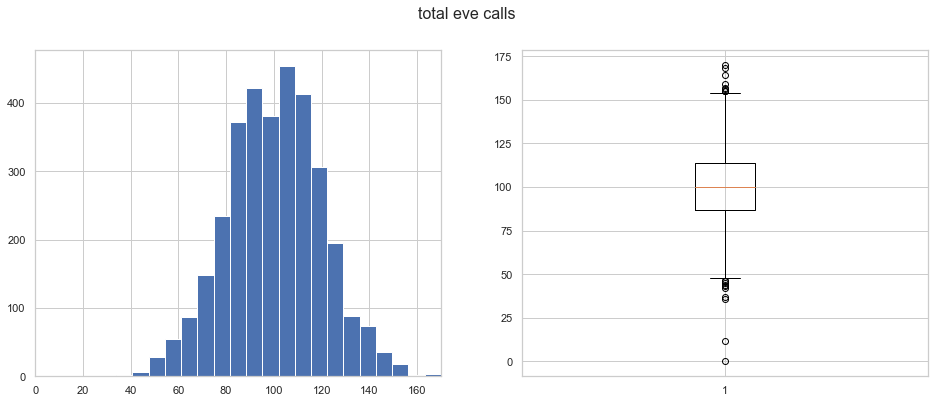

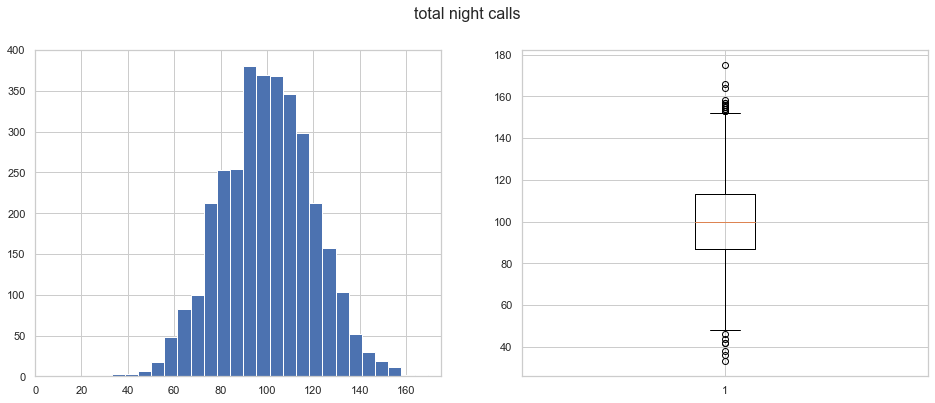

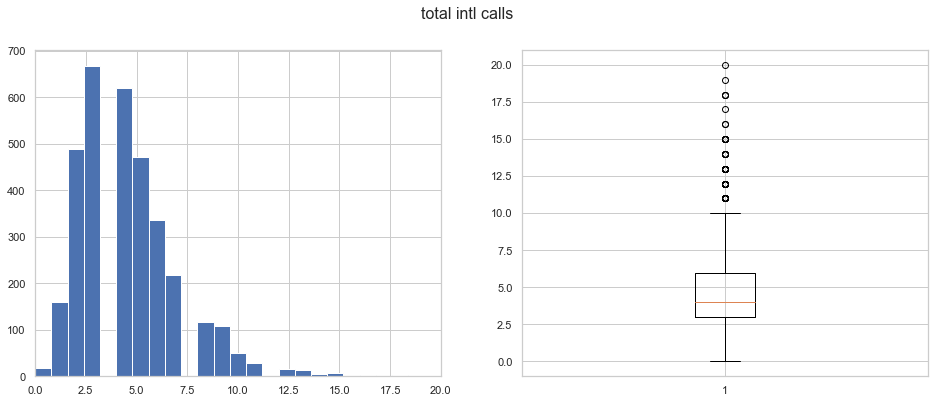

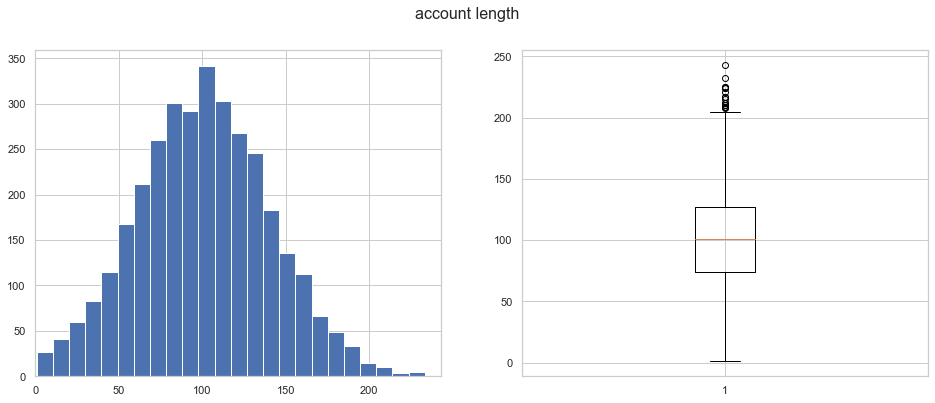

In [19]:
my_columns = ['total day calls','total eve calls','total night calls','total intl calls', 'account length']
plot_hist_box(my_columns, data)

In [20]:
outliers_columns = ['total day calls','total eve calls','total night calls','total intl calls', 'account length']
outliers_value = target_in_outliers(outliers_columns, 'churn', data)
outliers_value

What % of distribution the target in outliers has in given columns: 

TOTAL DAY CALLS
False    0.695652
True     0.304348
Name: churn, dtype: float64
-------------------------------------
TOTAL EVE CALLS
False    0.9
True     0.1
Name: churn, dtype: float64
-------------------------------------
TOTAL NIGHT CALLS
False    0.954545
True     0.045455
Name: churn, dtype: float64
-------------------------------------
TOTAL INTL CALLS
False    0.858974
True     0.141026
Name: churn, dtype: float64
-------------------------------------
ACCOUNT LENGTH
False    0.722222
True     0.277778
Name: churn, dtype: float64
-------------------------------------


,columns,fence_low,cnt_low,fence_high,cnt_high
0,total day calls,46.5,15,154.5,8
1,total eve calls,46.5,11,154.5,9
2,total night calls,48.0,8,152.0,18
3,total intl calls,-1.5,0,10.5,78
4,account length,-5.5,0,206.5,18


STATE
state        AK              AL         AR           AZ                CA  \
churn     False      True False True False True   False    True     False   
churn  0.942308  0.057692   0.9  0.1   0.8  0.2  0.9375  0.0625  0.735294   

state            ...        VT                  WA                  WI  \
churn      True  ...     False      True     False      True     False   
churn  0.264706  ...  0.890411  0.109589  0.787879  0.212121  0.910256   

state                 WV                 WY            
churn      True    False     True     False      True  
churn  0.089744  0.90566  0.09434  0.883117  0.116883  

[1 rows x 102 columns]
-------------------------------------

AREA CODE
area code       408                 415                510         
churn         False      True     False      True    False     True
churn      0.854415  0.145585  0.857402  0.142598  0.85119  0.14881
-------------------------------------

INTERNATIONAL PLAN
international plan       no         

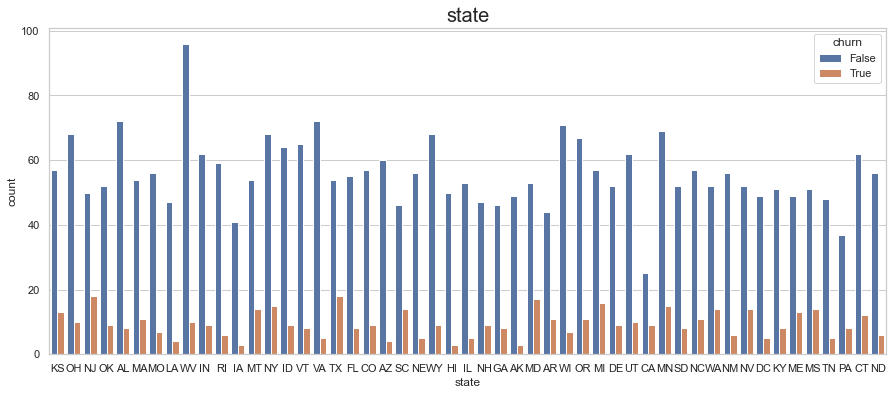

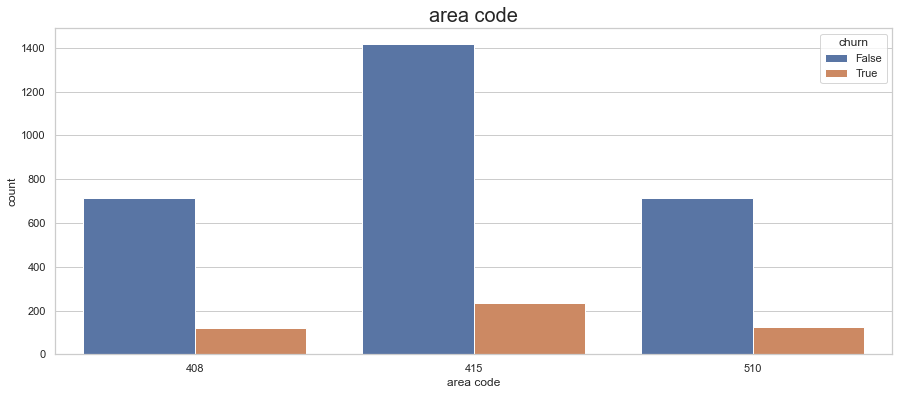

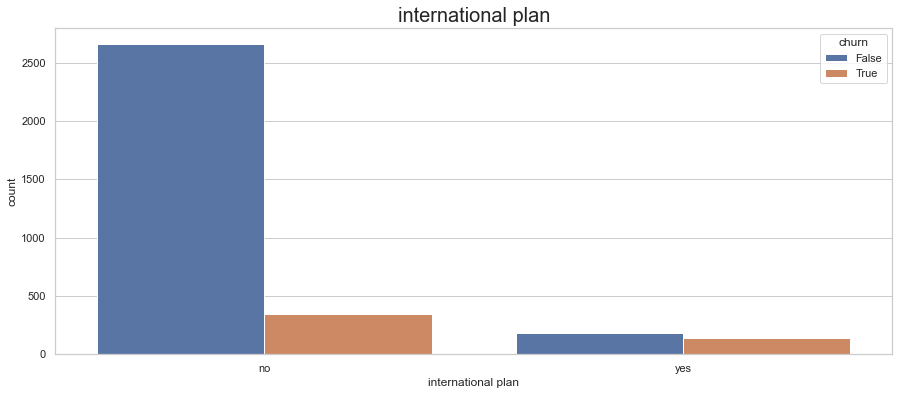

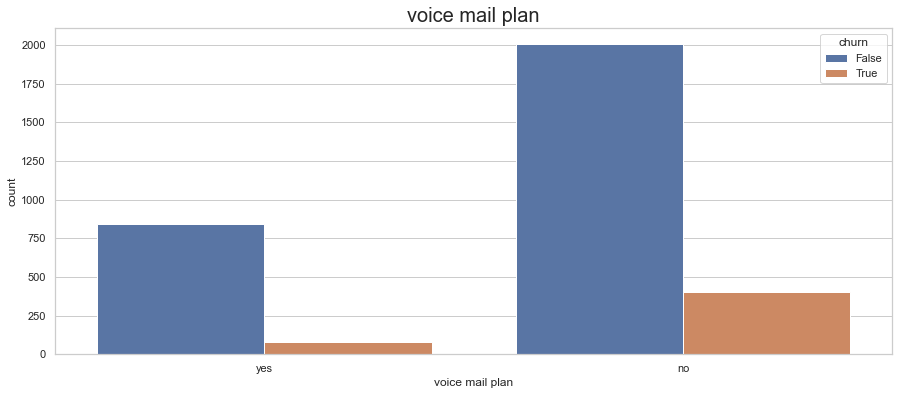

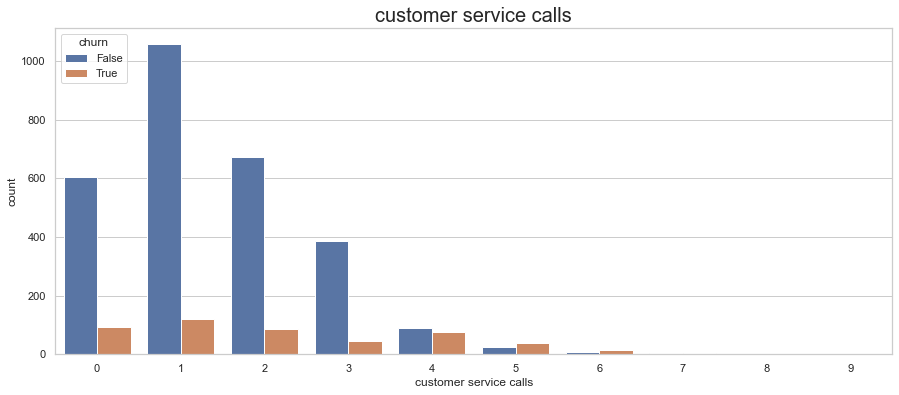

In [21]:
columns = ['state', 'area code', 'international plan', 'voice mail plan', 'customer service calls']
compare_with_target(columns, 'churn', data)

In [22]:
df_state = pd.DataFrame(data.groupby('state').churn.value_counts(normalize=True).reset_index(name='count'))
df_state[(df_state['churn'] == True) & (df_state['count'] >= 0.25)]

,state,churn,count
9,CA,True,0.264706
63,NJ,True,0.264706
87,TX,True,0.250000


### Conclusion after visualization:
1. STATE - there is 3 state in which churn made 1 out of 4 customers (CA, NJ, TX) and 9 where 1 of 5 made churn.
2. Variable AREA CODE doesn't seem to make much different for cusotmers churn.
3. Variable INTERNATIONAL PLAN gives us hint about customers churn, because in case when customers have international plan, half of them made churn.
4. VOICE MAIL PLAN for the first glance only have small contribution in helping to understand customers churn. If there is voice mail plan then probabily of churn by cutomers is greater.
5. CUSTOMER SERVICE CALLS - we can try to make new variable where number of calls after 4 will be group together as '> 4'
6. Rows whose values are caught as outliers contain many customers who stay loyal to telco industry (so for now we try to all data with outliers)

In [41]:
hide_toggle(for_next=True)

In [42]:
# Try to make new variable from CUSTOMER SERVICE CALLS
def prepare_modified_data(data):
    new_data = data.copy()
    
    conditions = [
    (new_data['customer service calls'] == 0),
    (new_data['customer service calls'] == 1),
    (new_data['customer service calls'] == 2),
    (new_data['customer service calls'] == 3),
    (new_data['customer service calls'] == 4),
    (new_data['customer service calls'] >= 5)
    ]

    # create a list of the values we want to assign for each condition
    values = [0,1,2,3,4,5]#['0', '1', '2', '3', '4', '5']

    # create a new column and use np.select to assign values to it using our lists as arguments
    new_data['customer calls'] = np.select(conditions, values)
    
    #drop old column:
    new_data.drop(['customer service calls'], axis=1, inplace=True)
    return new_data

In [25]:
new_data = prepare_modified_data(data)

In [26]:
# display updated DataFrame
new_data.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn,customer calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,False,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,False,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,False,0


In [27]:
new_data[(new_data['customer calls'] == 5)]['churn'].value_counts(normalize=True)

True     0.613861
False    0.386139
Name: churn, dtype: float64

#### Making 2 datasets:
- one with no changes -> data
- other with minor changes ( -> new_data):
    * dropping columns: 'customer service calls'
    * makes new variable 'customer calls' from 'customer service calls'

In [28]:
print(new_data.shape)
print(data.shape)

(3333, 21)
(3333, 21)


### Correlation and minor modification of data (using data without changes)

In [43]:
hide_toggle(for_next=True)

In [44]:
def basic_preprocess(data, target, col_to_drop: list = None, plot_corr='no', divide='no', label_exist: dict = None):
    """
    Parameters:
    > data: our dataset
    > target: our prediction column
    > col_to_drop: columns to drop from dataset - names of columns need to be put into a list
    > plot_corr: if we want to plot corellation matrix from our data. Default='no'  ['no', 'yes']
    > divide: if we want to divide our data into X and y data. Default='no' ['no', 'yes']
    
    This function makes categorical column into numeric with LabelEncoder, divide data 
    into 2 set: X, y and plot correlation matrix after dropping wanted columns.
    """
    if col_to_drop:
        data = data.drop(col_to_drop, axis=1)
    
    cat_col = [col for col in data.columns if data[col].dtype in ['bool', 'object']]
    print(f"Column to encode: {cat_col}")

    col_to_label = []
    for col in cat_col:
        b = [value for value in data[col].unique() if value not in ['yes', 'no', True, False]]
        if len(b) > 0:
            col_to_label.append(col)
        else:
            data[col] = data[col].apply(lambda x: 0 if x in ['no', False] else 1)
    print(f"Column to encoder: {len(col_to_label)}")
    
    if label_exist == None and len(col_to_label) == 1:
        encoder = LabelEncoder()
        encoder.fit(data[col_to_label[0]])
        label_exist = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        print(label_exist)
            
    if col_to_label == ['state']:
        data['state_name'] = data['state'].map(label_exist)  
        data.drop(['state'], axis=1, inplace=True)
        data.rename(columns = {'state_name':'state'}, inplace = True)
                    
    if plot_corr == 'yes':
        f, ax = plt.subplots(figsize=(20, 20))
        sns.heatmap(data.corr(method='pearson'), square=True, annot = True)
        plt.title("Correlation map", fontsize=12)
        plt.show()
    
    if divide == 'no':
        return data, label_exist
    else:
        data_y = data.pop(target)
        data_X = data
        return data_X, data_y, label_exist

Column to encode: ['state', 'international plan', 'voice mail plan', 'churn']
Column to encoder: 1
{'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 'WI': 48, 'WV': 49, 'WY': 50}


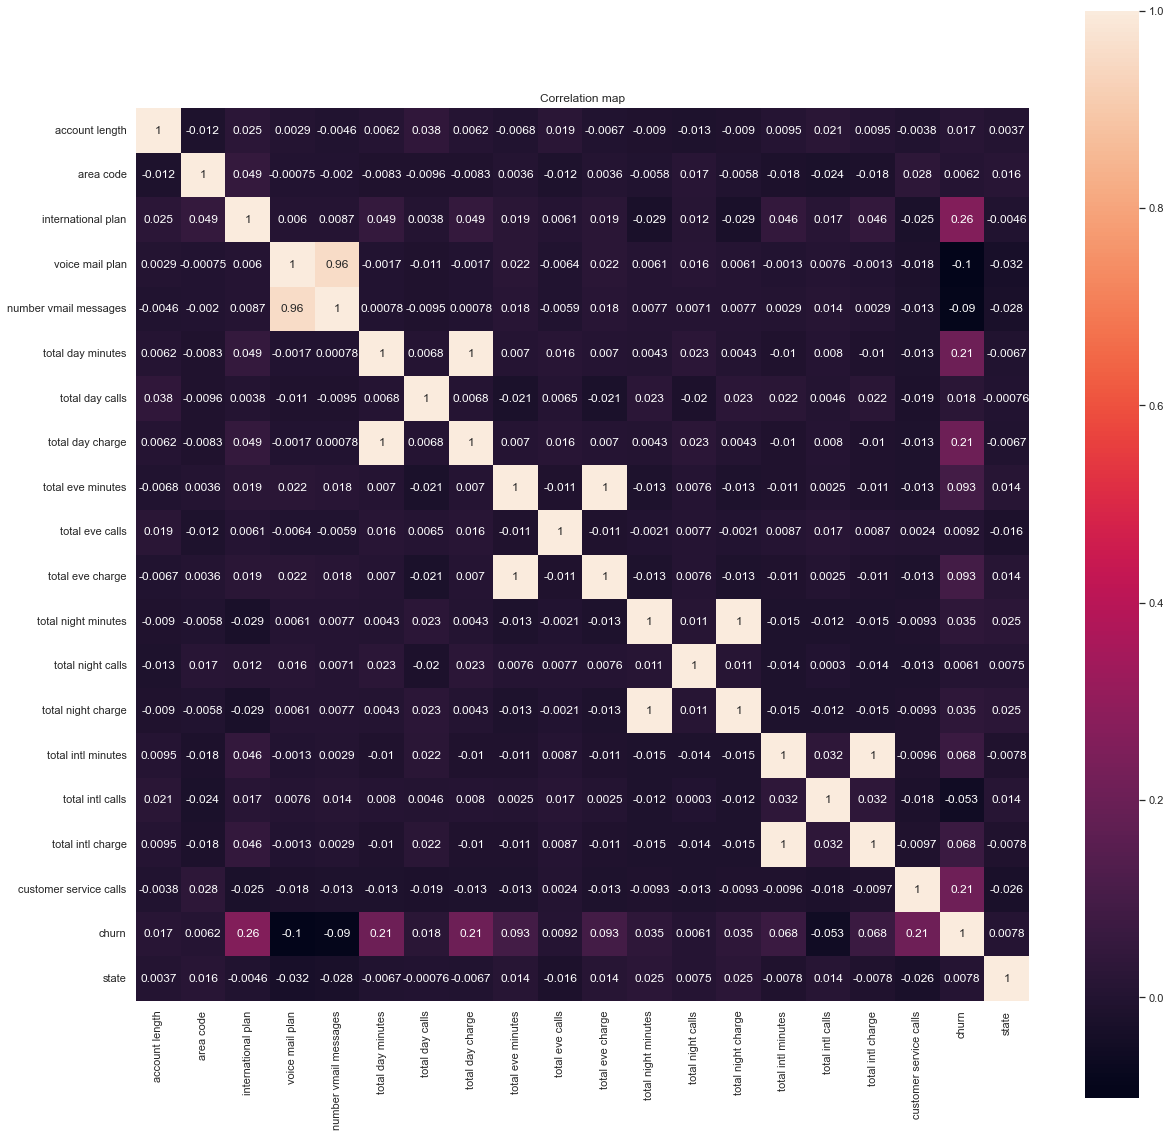

In [31]:
X, y, dict_with_mapping = basic_preprocess(data=data, 
                                           target='churn', 
                                           plot_corr='yes', 
                                           col_to_drop=['phone number'], 
                                           divide='yes')

In [32]:
X.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,16
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,35
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,31
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,35
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,36


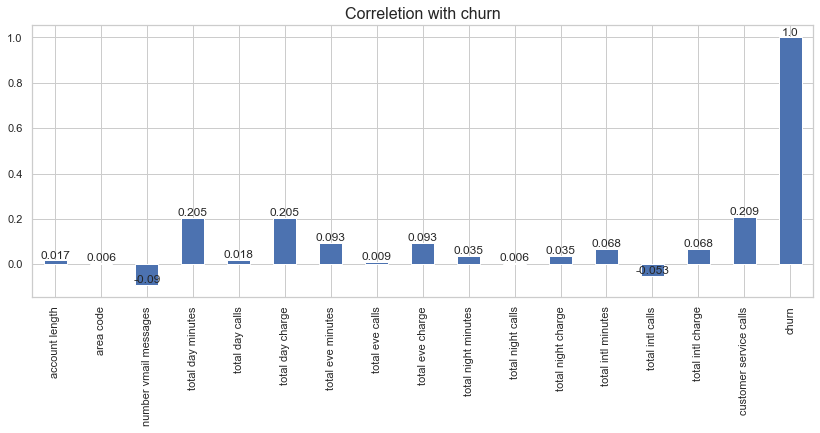

In [33]:
corr_plot(data, 'churn')

We can see which columns are higly correleted with each other and with predicted variable. We will try to use data with them in our models but also without them.

In [34]:
columns_high_corr = col_to_drop_after_high_corr(data, 0.9)
columns_high_corr

['total day charge',
 'total eve charge',
 'total night charge',
 'total intl charge']

[Go back to the table of contents](#0-bullet)

## 5. Feature selection and dimension reduction <a class="anchor" id="5-bullet"></a>

In [35]:
normalizer = Normalizer()
standarizer = StandardScaler()
minmaxscaler = MinMaxScaler()

#### Selecting features by few methods:

In [29]:
# How many features we want to select:
X, y, mapp = basic_preprocess(data=data, 
                        target='churn', 
                        divide='yes',
                        col_to_drop=['phone number'],
                        label_exist = dict_with_mapping
                       )

Column to encode: ['state', 'international plan', 'voice mail plan', 'churn']
Column to encoder: 1


In [45]:
# How many features we want to select:
feature_name = list(X.columns)
num_feats = 12
random_state = 42
preprocessor = minmaxscaler

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify = y)

In [32]:
hide_toggle(for_next=True)

In [33]:
def selecting_features(X, y, preprocessor, num_feats):

    X_norm = preprocessing(X, preprocessor)
    support_metrics = []
    cor_list = []
    
    feature_name = X.columns.tolist()
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    print('Pearson correlation:', str(len(cor_feature)), 'selected features')
    support_metrics.append({'name': 'pearson_cor',
                            'support': cor_support})

    models = {'chi_square': SelectKBest(chi2, k=num_feats),
              'rfe': RFE(estimator=LogisticRegression(), 
                                     n_features_to_select=num_feats, 
                                     step=10, 
                                     verbose=5),
              'lr_lasso': SelectFromModel(LogisticRegression(penalty="l2"), 
                                          max_features=num_feats),
              'tree': SelectFromModel(RandomForestClassifier(n_estimators=100), 
                                      max_features=num_feats) 
            }
    
    for name, model in models.items():
        selector = model
        selector.fit(X_norm, y)
        support = selector.get_support()
        print(f'{name} selector', str(len(X.loc[:,support].columns.tolist())), 'selected features')
        support_metrics.append({'name': name,
                                'support': support})
    
    return support_metrics

In [34]:
support_metrics = selecting_features(X_train, y_train, preprocessor, num_feats)

Pearson correlation: 12 selected features
chi_square selector 12 selected features
Fitting estimator with 19 features.
rfe selector 12 selected features
lr_lasso selector 8 selected features
tree selector 6 selected features


In [35]:
for n in range(5):
    print(support_metrics[n].get('name'))

pearson_cor
chi_square
rfe
lr_lasso
tree


In [36]:
# Creating dataframe with outcomes:
feature_selection_df = print_feature_summary(feature_name, support_metrics[0].get('support'), \
                                             support_metrics[1].get('support'), support_metrics[2].get('support'), \
                                             support_metrics[3].get('support'), support_metrics[4].get('support'))
feature_selection_df

Name of this dataframe: 'feature_selection_df'


C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,total eve minutes,True,True,True,True,True,5
2,total eve charge,True,True,True,True,True,5
3,total day minutes,True,True,True,True,True,5
4,total day charge,True,True,True,True,True,5
5,international plan,True,True,True,True,True,5
6,customer service calls,True,True,True,True,True,5
7,voice mail plan,True,True,True,True,False,4
8,total intl calls,True,True,True,True,False,4
9,total intl minutes,True,True,True,False,False,3
10,total intl charge,True,True,True,False,False,3


## Methods to deal with unbalaced data using RandomForest model <a class="anchor" id="51-bullet"></a>

- SMOTE
- Resample


* [1. Score on resampled data](#10-bullet)
* [2. Score with PCA](#11-bullet)
* [3. Score on dataset with all features](#12-bullet)
* [4. Score on data with 5 methods feature selection](#13-bullet)
* [5. Score on data without high corr columns](#14-bullet)

In [66]:
# Choosing parameters:
model = RandomForestClassifier(random_state=random_state)

params = {
    'clf__max_depth': [5, 7, 10],
    'clf__max_samples': [0.75, 1], 
    'clf__n_estimators': [100, 200, 300],
    'clf__min_samples_leaf': [1, 5]  
    }

sm = SMOTE(sampling_strategy='auto', random_state=random_state)

preprocessor = minmaxscaler

#### Score on resampled data  <a class="anchor" id="10-bullet"></a>

In [59]:
# Function to resample date
hide_toggle(for_next=True)

In [60]:
def resample_data(data, target, col_to_drop:list = None, label_exist=dict_with_mapping):
    """ 
    This function takes:
    < target - name of target columns in string
    < data - our dataset
    < col_to_drop - list of column names which we want to drop
    And resample data if there is 2 classes to predict.
    """
    df, dict_with_mapping = basic_preprocess(data=data, 
                                             target='churn', 
                                             plot_corr='no', 
                                             col_to_drop=['phone number'], 
                                             divide='no', 
                                             label_exist=label_exist)
    if data[target].nunique() == 2:
        
        unique = data[target].unique().tolist()
        if len(data[data[target] == unique[0]]) > len(data[data[target] == unique[1]]):
            unique_more = unique[0]
            unique_less = unique[1]
        else:
            unique_more = unique[1]
            unique_less = unique[0]
            
        df_0 = df[df[target] == unique_more ]
        df_1 = df[df[target] == unique_less ]
        n_y = len(df_1)
        df_0_downsample = resample(df_0, 
                                   replace = True,    
                                   n_samples = 2*n_y,    
                                   random_state = 42)
        df_1_upsample = resample(df_1, 
                                   replace = True,    
                                   n_samples = round((n_y*1.1) / 2) * 2,    
                                   random_state = 42)
        data_resmaple = pd.concat([df_0_downsample, df_1_upsample])

        y = data_resmaple.pop(target)
        X = data_resmaple
        print(f"New dataset after resampling has: {data_resmaple.shape[0]} rows")
        return y, X
    else:
        return 'There is more then 2 class in the target variable'

In [61]:
# Function to print Validation score on test dataset
hide_toggle(for_next=True)

In [62]:
def find_best_option_new(model, X_train, y_train, preprocessor, params=None, balance=None, best_models=None):
    """
    This functions takes:
    < model
    < X_train
    < y_train 
    < params (default: None) - which parameters for certain model we want to use
    < balance (default: None) - option to balance unbalanced data, for example using SMOTE method
    < best_models (default: None)
    And returns fit model on which we can make further transformation. 
    """
    if best_models == None:
        if balance == None:
            pipeline = Pipeline([('scaler', preprocessor),
                                 ('clf', model)])
        else:
            pipeline = Pipeline([('scaler', preprocessor),
                                 ('sm', balance), 
                                 ('clf', model)])

        gs = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring='f1', return_train_score=True)
        gs.fit(X_train, y_train)
        return gs
    else:
        optimizer = GridSearchCV(model, 
                                 param_grid=params, 
                                 cv=5, 
                                 scoring="f1",
                                 n_jobs=-1)
        optimizer.fit(X_train, y_train)
        return optimizer

In [63]:
# dataset after resampling:
y_res, X_res = resample_data(data=data, target='churn', col_to_drop = ['phone number'])

Column to encode: ['state', 'international plan', 'voice mail plan', 'churn']
Column to encoder: 1
New dataset after resampling has: 1498 rows


In [64]:
# dataset after resampling:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, \
                                                                    random_state=42, stratify = y_res)

In [69]:
# Resample data:
gs_resample = find_best_option_new(model, X_train_res, y_train_res, preprocessor, params = params)
print("Validation score for resample data: {:.2f}".format(gs_resample.score(X_test_res, y_test_res)))
gs_resample_sm = find_best_option_new(model, X_train_res, y_train_res, preprocessor, params = params, balance=sm)
print("Validation score for resample data with smote: {:.2f}".format(gs_resample_sm.score(X_test_res, y_test_res)))

Validation score for resample data: 0.92
Validation score for resample data with smote: 0.94


#### Score with PCA  <a class="anchor" id="11-bullet"></a>

In [76]:
pca = PCA(0.95)

In [77]:
hide_toggle(for_next=True)

In [78]:
def data_after_pca(X_train, X_test, y_train, y_test, preprocessor, model, params, sm, pca):
    
    pipe = Pipeline(steps=[("scaler", preprocessor), 
                           ("pca", pca), 
                           ("clf", model)
                          ])
    pipe_sm = Pipeline(steps=[("scaler", preprocessor), 
                              ("sm", sm),
                              ("pca", pca), 
                              ("clf", model)
                             ])
    params = params
    
    gs = GridSearchCV(pipe, params, cv=5, n_jobs=-1, scoring='f1', return_train_score=True)
    gs.fit(X_train, y_train)
    print("Validation score for data with PCA: {:.2f}".format(gs.score(X_test, y_test)))
    gs_sm = GridSearchCV(pipe_sm, params, cv=5, n_jobs=-1, scoring='f1', return_train_score=True)
    gs_sm.fit(X_train, y_train)
    print("Validation score for data with PCA and SMOTE: {:.2f}".format(gs_sm.score(X_test, y_test)))

In [80]:
data_after_pca(X_train, X_test, y_train, y_test, preprocessor, model, params, sm, pca)

Validation score for data with PCA: 0.53
Validation score for data with PCA and SMOTE: 0.64


#### Score on dataset with all features:  <a class="anchor" id="12-bullet"></a>

In [53]:
gs = find_best_option_new(model, X_train, y_train, preprocessor, \
                      params=params, balance=None, best_models=None)

In [54]:
gs_sm = find_best_option_new(model, X_train, y_train, preprocessor, \
                         params=params, balance=sm, best_models=None)

In [55]:
print("Validation score for data with all feature: {:.2f}".format(gs.score(X_test, y_test)))
print("Validation score for data with all feature with sm: {:.2f}".format(gs_sm.score(X_test, y_test)))

Validation score for data with all feature: 0.77
Validation score for data with all feature with sm: 0.71


#### Score on data with 5 methods feature selection:  <a class="anchor" id="13-bullet"></a>

In [56]:
# dataset with selected feature by few methods together:
n = len(feature_selection_df.loc[feature_selection_df['Total'] > 2])
col_to_take = feature_selection_df['Feature'][:n]
X_selected = X[col_to_take]
print(f"Dataset with selected feature by few methods together has: {X_selected.shape[1]} features.")

Dataset with selected feature by few methods together has: 11 features.


In [57]:
X_train_m5, X_test_m5, y_train_m5, y_test_m5 = train_test_split(X_selected, y, test_size=0.2, random_state=random_state, stratify = y)

In [58]:
gs_m5 = find_best_option_new(model, X_train_m5, y_train_m5, preprocessor, \
                      params=params, balance=None, best_models=None)

In [59]:
gs_m5_sm = find_best_option_new(model, X_train_m5, y_train_m5, preprocessor, \
                      params=params, balance=sm, best_models=None)

In [60]:
print("Validation score for 5 methods: {:.2f}".format(gs_m5.score(X_test_m5, y_test_m5)))
print("Validation score for 5 methods: {:.2f}".format(gs_m5_sm.score(X_test_m5, y_test_m5)))

Validation score for 5 methods: 0.78
Validation score for 5 methods: 0.71


#### Score on data without high corr columns:  <a class="anchor" id="14-bullet"></a>

In [61]:
# dataset without column with high correlation:
col_to_drop = col_to_drop_after_high_corr(data, 0.9)
col_to_stay = [col for col in X.columns if col not in col_to_drop]
X_no_high_corr = X[col_to_stay]
print(f"Dataset without column which are higly correlated has: {X_no_high_corr.shape[1]} features.")

Dataset without column which are higly correlated has: 15 features.


In [62]:
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_no_high_corr, y, test_size=0.2, random_state=random_state, stratify = y)

In [63]:
gs_corr = find_best_option_new(model, X_train_corr, y_train_corr, preprocessor, \
                      params=params, balance=None, best_models=None)

In [64]:
gs_corr_sm = find_best_option_new(model, X_train_corr, y_train_corr, preprocessor, \
                      params=params, balance=sm, best_models=None)

In [65]:
print("Validation score for data without high corr columns: {:.2f}".format(gs_corr.score(X_test_corr, y_test_corr)))
print("Validation score for data without high corr columns: {:.2f}".format(gs_corr_sm.score(X_test_corr, y_test_corr)))

Validation score for data without high corr columns: 0.68
Validation score for data without high corr columns: 0.69


[Go back to the table of contents](#0-bullet)

## 6. Classification with different models <a class="anchor" id="6-bullet"></a>
### Selecting best models, best params and showing metrics

In [46]:
X, y, mapping = basic_preprocess(data=data, 
                        target='churn', 
                        divide='yes',
                        col_to_drop=['phone number'],
                        label_exist = dict_with_mapping
                       )

Column to encode: ['state', 'international plan', 'voice mail plan', 'churn']
Column to encoder: 1


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=random_state, 
                                                    stratify = y)

In [48]:
models_name = ['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier',\
               'GradientBoostingClassifier', 'KNeighborsClassifier', 'AdaBoostClassifier', 'XGBClassifier']

models = [
    Pipeline([("scaler", StandardScaler()), 
              ("clf", LogisticRegression(max_iter=1000))]),
    Pipeline([("scaler", StandardScaler()), 
              ("clf", SVC(kernel='rbf'))]),
    Pipeline([('clf', DecisionTreeClassifier())]),
    Pipeline([('clf', RandomForestClassifier())]),
    Pipeline([('clf', GradientBoostingClassifier())]),
    Pipeline([('clf', KNeighborsClassifier())]),
    Pipeline([('clf', AdaBoostClassifier())]),
    Pipeline([('clf', xgb.XGBClassifier())])
]

params = [
    {'clf__C': [0.1, 5, 10, 15],
    'clf__penalty': ['l2', 'none']},
    {"clf__C": [0.01, 0.1, 1, 10], 
     "clf__gamma": [0.1, 1, 10, 'scale', 'auto']},
    {"clf__min_samples_leaf": [1, 5],
     "clf__max_features": [0.75, 1],
     "clf__max_depth": [5,7,10],
     "clf__criterion": ['gini', 'entropy']},
    {"clf__n_estimators": [350, 400],
     "clf__min_samples_leaf": [1, 3],
     "clf__max_samples": [0.75, 1]},
    {"clf__n_estimators": [150, 200, 250],
     "clf__min_samples_leaf": [3, 5, 8, 10]},
    {"clf__n_neighbors": [5, 10, 15]},
    {"clf__n_estimators": [50,100]},
    {"clf__max_depth":  [4,5], 
     "clf__n_estimators": [250,300,350],
     "clf__subsample": [0.8, 0.85, 0.9],
     "clf__colsample_bytree": [0.75, 0.9],
     "clf__gamma": [0.1, 1, 3]}
]

In [49]:
df_metrics_value, metrics_value = looking_for_parameters(X_train, X_test, y_train, y_test, models, params, models_name)

Looking for best parameters for LogisticRegression
Done!
Looking for best parameters for SVC
Done!
Looking for best parameters for DecisionTreeClassifier
Done!
Looking for best parameters for RandomForestClassifier
Done!
Looking for best parameters for GradientBoostingClassifier
Done!
Looking for best parameters for KNeighborsClassifier
Done!
Looking for best parameters for AdaBoostClassifier
Done!
Looking for best parameters for XGBClassifier
Done!


In [50]:
df_metrics_value

,model_name,best_params,accuracy,precision,recall,f1,mislabeled,total
7,XGBClassifier,"{'clf__colsample_bytree': 0.9, 'clf__gamma': 3, 'clf__max_depth': 4, 'clf__n_estimators': 350, 'clf__subsample': 0.9}",0.950000,0.910000,0.870000,0.890000,35,667
4,GradientBoostingClassifier,"{'clf__min_samples_leaf': 8, 'clf__n_estimators': 150}",0.940000,0.910000,0.860000,0.880000,37,667
3,RandomForestClassifier,"{'clf__max_samples': 0.75, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 400}",0.940000,0.920000,0.830000,0.870000,40,667
2,DecisionTreeClassifier,"{'clf__criterion': 'gini', 'clf__max_depth': 7, 'clf__max_features': 0.75, 'clf__min_samples_leaf': 5}",0.940000,0.900000,0.830000,0.860000,42,667
1,SVC,"{'clf__C': 10, 'clf__gamma': 'scale'}",0.910000,0.830000,0.760000,0.790000,62,667
6,AdaBoostClassifier,{'clf__n_estimators': 100},0.860000,0.720000,0.660000,0.680000,92,667
5,KNeighborsClassifier,{'clf__n_neighbors': 5},0.870000,0.760000,0.620000,0.650000,86,667
0,LogisticRegression,"{'clf__C': 10, 'clf__penalty': 'l2'}",0.860000,0.710000,0.600000,0.620000,94,667


[Go back to the table of contents](#0-bullet)

## 7. CROSS VAL SCORE <a class="anchor" id="7-bullet"></a>
### Check if different model cause overfitting or not

Czu potrzebne są tu random_state ??

In [51]:
sfk = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

In [52]:
clf = {
    'LogisticRegression' :LogisticRegression(random_state=random_state), 
    'SVM': SVC(random_state=random_state), 
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=random_state), 
    'RandomForestClassifier':RandomForestClassifier(random_state=random_state),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=random_state), 
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=random_state),
    'XGBoost': xgb.XGBClassifier(random_state=random_state)
}

#### Cross validation before tune (on default parameters):

In [53]:
df_cv_scores_before = cvs_scores_to_df(clf, X, y, 'f1', 0.1, sfk)
df_cv_scores_before.sort_values(by ='mean', ascending=False)

This function made dataframe with scores from different models through cross validation using f1 to score models.


,model,mean,min,max,overfitting,diff
7,XGBoost,0.829232,0.790419,0.860335,No,0.07
4,GradientBoostingClassifier,0.806593,0.785276,0.827586,No,0.04
3,RandomForestClassifier,0.804713,0.781065,0.831461,No,0.05
2,DecisionTreeClassifier,0.695948,0.643902,0.746411,Yes,0.10
1,SVM,0.636831,0.619355,0.671053,No,0.05
5,KNeighborsClassifier,0.473140,0.439394,0.514286,No,0.07
6,AdaBoostClassifier,0.460523,0.386207,0.534161,Yes,0.15
0,LogisticRegression,0.297730,0.236220,0.391608,Yes,0.16


#### Cross validation after tune (using best parameters):

In [54]:
clf = {
    'LogisticRegression' :LogisticRegression(random_state=random_state), 
    'SVM': SVC(C=10, gamma='scale', random_state=random_state), 
    'DecisionTreeClassifier': DecisionTreeClassifier(min_samples_leaf=5, max_features=0.75, criterion='entropy', max_depth=7, random_state=random_state), 
    'RandomForestClassifier':RandomForestClassifier(max_samples=0.75, n_estimators=400, min_samples_leaf=1, random_state=random_state),
    'GradientBoostingClassifier': GradientBoostingClassifier(min_samples_leaf=5, n_estimators=200, random_state=random_state), 
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=random_state),
    'XGBoost': xgb.XGBClassifier(colsample_bytree=0.9, gamma=3, max_depth=4, n_estimators=350, subsample=0.9, random_state=random_state)
}

In [55]:
df_cv_scores_after = cvs_scores_to_df(clf, X, y, 'f1', 0.1, sfk)

This function made dataframe with scores from different models through cross validation using f1 to score models.


In [56]:
df_cv_scores_after.sort_values(by ='mean', ascending=False)

,model,mean,min,max,overfitting,diff
7,XGBoost,0.833188,0.786127,0.868132,No,0.08
4,GradientBoostingClassifier,0.818406,0.780488,0.849162,No,0.07
3,RandomForestClassifier,0.804910,0.765432,0.837209,No,0.07
2,DecisionTreeClassifier,0.760354,0.716049,0.800000,No,0.08
1,SVM,0.708230,0.681319,0.736264,No,0.05
5,KNeighborsClassifier,0.473140,0.439394,0.514286,No,0.07
6,AdaBoostClassifier,0.460523,0.386207,0.534161,Yes,0.15
0,LogisticRegression,0.297730,0.236220,0.391608,Yes,0.16


[Go back to the table of contents](#0-bullet)

## 8. Trying improve prediction with XGBoost model <a class="anchor" id="8-bullet"></a> 

In [65]:
# CREATING VARIABLES

# XGBoost with best parameters
model_xgb = xgb.XGBClassifier(colsample_bytree=0.9, gamma=3, max_depth=4, n_estimators=350, subsample=0.9, \
                          random_state=random_state, tree_method='gpu_hist')

sm = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=random_state)

scaler = StandardScaler()

selector = SelectFromModel(model_xgb)

# Model with SMOTE
pipe_sm = Pipeline([
('sm', sm),
('classifier', model_xgb)
])

# Extended model
pipe = Pipeline([
('scaler', scaler),
('selector', selector),
('sm', sm),
('classifier', model_xgb)
])

In [66]:
# Trying model on resampling original data:

print_report_for_classification(model_xgb, 
                                X_train_res, 
                                X_test_res, 
                                y_train_res, 
                                y_test_res, 
                                X_res, 
                                y_res, 
                                target_names=["Stay", "Churn"])

          AUC    GINI
TRAIN  0.9816  0.9631
TEST   0.9531  0.9062

 ------------------------------------------------------

Training set score: 0.9440734557595993
Test set score: 0.9333333333333333

 ------------------------------------------------------
Classification_report: 

              precision    recall  f1-score   support

        Stay       0.92      0.98      0.95       193
       Churn       0.97      0.84      0.90       107

    accuracy                           0.93       300
   macro avg       0.94      0.91      0.93       300
weighted avg       0.94      0.93      0.93       300


XG Boosting cross-validation scores: [0.86868687 0.85436893 0.87619048 0.9        0.89215686]
XG Boosting cross-validation mean score: 0.88

 ------------------------------------------------------

Metrics:
Accuracy: 0.93
Precision: 0.94
Recall: 0.91
f1: 0.92
Mislabeled: 20. It's: 6.67% of test data
Total: 300

 ------------------------------------------------------

Confusion matrix:
[[19

In [67]:
# Trying model with SMOTE on original data:
print_report_for_classification(pipe_sm, X_train, X_test, y_train, y_test, X, y, target_names=["Stay", "Churn"])

          AUC    GINI
TRAIN  0.9812  0.9624
TEST   0.8594  0.7188

 ------------------------------------------------------

Training set score: 0.9621155288822205
Test set score: 0.9010494752623688

 ------------------------------------------------------
Classification_report: 

              precision    recall  f1-score   support

        Stay       0.95      0.93      0.94       570
       Churn       0.64      0.71      0.68        97

    accuracy                           0.90       667
   macro avg       0.80      0.82      0.81       667
weighted avg       0.91      0.90      0.90       667


XG Boosting cross-validation scores: [0.75598086 0.7434555  0.79227053 0.71276596 0.77386935]
XG Boosting cross-validation mean score: 0.76

 ------------------------------------------------------

Metrics:
Accuracy: 0.9
Precision: 0.8
Recall: 0.82
f1: 0.81
Mislabeled: 66. It's: 9.9% of test data
Total: 667

 ------------------------------------------------------

Confusion matrix:
[[532  

In [68]:
# Preparing data from new_data:
X_n, y_n, mapping = basic_preprocess(data=prepare_modified_data(data), 
                            target='churn', 
                            plot_corr='no', 
                            col_to_drop=['phone number'], 
                            divide='yes',
                            label_exist = dict_with_mapping)

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, 
                                                    y_n, 
                                                    test_size=0.2, 
                                                    random_state=random_state, 
                                                    stratify = y_n)

Column to encode: ['state', 'international plan', 'voice mail plan', 'churn']
Column to encoder: 1


In [69]:
# Try SMOTE on my data set (with change 1 column) with XGBoost:

print_report_for_classification(pipe_sm, X_train_n, X_test_n, y_train_n, y_test_n, X_n, y_n, target_names=["Stay", "Churn"])

          AUC    GINI
TRAIN  0.9803  0.9606
TEST   0.8709  0.7418

 ------------------------------------------------------

Training set score: 0.9643660915228808
Test set score: 0.9025487256371814

 ------------------------------------------------------
Classification_report: 

              precision    recall  f1-score   support

        Stay       0.95      0.94      0.94       570
       Churn       0.66      0.69      0.67        97

    accuracy                           0.90       667
   macro avg       0.80      0.81      0.81       667
weighted avg       0.90      0.90      0.90       667


XG Boosting cross-validation scores: [0.75121951 0.75       0.80769231 0.76595745 0.78756477]
XG Boosting cross-validation mean score: 0.77

 ------------------------------------------------------

Metrics:
Accuracy: 0.9
Precision: 0.8
Recall: 0.81
f1: 0.81
Mislabeled: 65. It's: 9.75% of test data
Total: 667

 ------------------------------------------------------

Confusion matrix:
[[535 

In [70]:
# Try XGBoost on my data set (with change 1 column):

print_report_for_classification(pipe, X_train_n, X_test_n, y_train_n, y_test_n, X_n, y_n, target_names=["Stay", "Churn"])

          AUC    GINI
TRAIN  0.9657  0.9314
TEST   0.8919  0.7839

 ------------------------------------------------------

Training set score: 0.9673668417104276
Test set score: 0.9280359820089955

 ------------------------------------------------------
Classification_report: 

              precision    recall  f1-score   support

        Stay       0.97      0.95      0.96       570
       Churn       0.73      0.80      0.76        97

    accuracy                           0.93       667
   macro avg       0.85      0.88      0.86       667
weighted avg       0.93      0.93      0.93       667


XG Boosting cross-validation scores: [0.79166667 0.76142132 0.80628272 0.81865285 0.81481481]
XG Boosting cross-validation mean score: 0.80

 ------------------------------------------------------

Metrics:
Accuracy: 0.93
Precision: 0.85
Recall: 0.88
f1: 0.86
Mislabeled: 48. It's: 7.2% of test data
Total: 667

 ------------------------------------------------------

Confusion matrix:
[[541

In [71]:
columns_to_drop = col_to_drop_after_high_corr(data, 0.9)
columns_to_drop.append('phone number')

X_hc, y_hc, mapping = basic_preprocess(data=prepare_modified_data(data), 
                              target='churn', 
                              plot_corr='no', 
                              col_to_drop=columns_to_drop, 
                              divide='yes')

X_train_hc, X_test_hc, y_train_hc, y_test_hc = train_test_split(X_hc, 
                                                    y_hc, 
                                                    test_size=0.2, 
                                                    random_state=random_state, 
                                                    stratify = y_hc)

print(f"Columns that have been removed from the dataset: {columns_to_drop}\n")
print_report_for_classification(pipe, X_train_hc, X_test_hc, y_train_hc, y_test_hc, X_hc, y_hc, target_names=["Stay", "Churn"])

Column to encode: ['state', 'international plan', 'voice mail plan', 'churn']
Column to encoder: 1
{'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 'WI': 48, 'WV': 49, 'WY': 50}
Columns that have been removed from the dataset: ['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'phone number']

          AUC    GINI
TRAIN  0.9456  0.8912
TEST   0.8565  0.7130

 ------------------------------------------------------

Training set score: 0.9343585896474118
Test set score: 0.8935532233883059

 --------------------------------------------------

[Go back to the table of contents](#0-bullet)

## 9. SUMMARY <a class="anchor" id="9-bullet"></a>

To predict customer churn, I tested different dataset based on several methods:
- dimensionality reduction (PCA)
- feature selection, using methods such as:   
    - pearson_cor_selector
    - chi_square_selector
    - rfe_selector
    - lr_lasso_selector
    - decision_tree_selector
- creating a dataset without strongly correlated columns
- balancing dataset through the resample and smote methods
- leaving the original data for comparison.

The above methods were based on the Random Forest model.
After analyzing the results, the best set turned out to be the one using the resample and smote methods.

Further analysis was aimed at selecting the best model for a more in-depth prediction analysis and the selection of hyperparameters for this model. Therefore, in the table, I have put together different models for classification to choose the one that gives good results and does not overfitting. One of such models turned out to be XGBoost, whose the mean of cross-validation is the highest and the divergence of the minimum and maximum measures is the lowest, so this model may be good to counteract overfitting. Therefore, based on this model, I tested various prepared sets.
The following models are also worthy of further analysis:
- GradientBoostingClassifier	
- RandomForestClassifier

<ins>I tested with the XGBoost model:</ins>
1. original dataset after resampling
2. original dataset with smote
3. dataset with 1 replaced column and with smote
4. dataset with 1 replaced column and without smote 
5. dataset with replaced column and removed features strongly correlated

The f1 measure was used for scoring when calculating the next metrics, because it is a much better measure than accuracy. Due to the fact that we do not know if we care more about avoiding the classification of regular customers as churn or not noticing customers who do it, f1 seems the most sensible, because it compares recall and precision in one measure. It is also a good measure for the binary classification we are dealing with.


<ins>After analyzing the results of the XGBoost model for individual steps, the conclusions are as follows: </ins>
- on the original dataset, resampling is better than smote
- dataset with 1 replaced column ("customer service calls") gives better results with SMOTE method
- a dataset where highly correlated columns have been removed gives good results, but the model itself is overfitting.

<ins>Description of datasets:</ins>
* The original dataset is the one where the data has not been processed. The only change is the removal of the column: phone number that contained only unique values
* Dataset with 1 replaced column it's dataset with changed the column: "customer service calls" into the "customer calls" column where the number of phones over 4 has been grouped to 5


#### Final conclusions:

The best option seems to be resampling on an unchanged data set. However, its good results may not necessarily translate into everyday life because the amount of data has been greatly reduced, so that some issues that could be used to predict churn could not be caught here.
Therefore, the best option is a dataset with a modified column and SMOTE method on the XGBoost model, which allows to predict churn above 70%, and cross validation shows that the model does not overfit to a large extent.


[Go back to the table of contents](#0-bullet)